<a href="https://colab.research.google.com/github/YasirKhattakk/DataAnalysis/blob/main/Copy_of_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#""""#

# **Bike store sales**  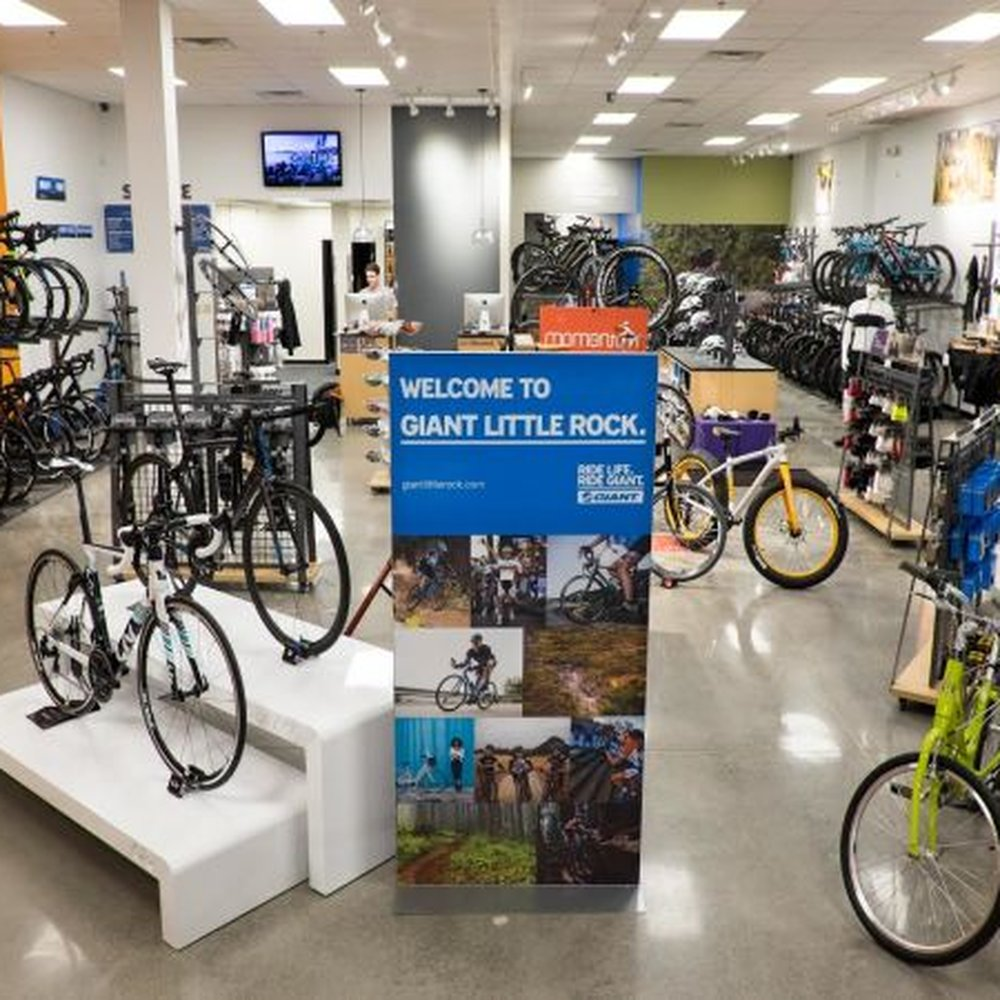

### **Importing essentials**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### *Loading dataset...*

In [ ]:
!head sample_data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

### **What exactly do we have? (Data View)**

In [ ]:


sales = pd.read_csv('sample_data/sales_data.csv', parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


### **Table Count (Rows & Columns)**

In [ ]:
sales.shape

(62205, 18)

### **Meta Data**

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62205 entries, 0 to 62204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              62205 non-null  datetime64[ns]
 1   Day               62205 non-null  int64         
 2   Month             62205 non-null  object        
 3   Year              62205 non-null  int64         
 4   Customer_Age      62205 non-null  int64         
 5   Age_Group         62204 non-null  object        
 6   Customer_Gender   62204 non-null  object        
 7   Country           62204 non-null  object        
 8   State             62204 non-null  object        
 9   Product_Category  62204 non-null  object        
 10  Sub_Category      62204 non-null  object        
 11  Product           62204 non-null  object        
 12  Order_Quantity    62204 non-null  float64       
 13  Unit_Cost         62204 non-null  float64       
 14  Unit_Price        6220

### **Data Description**

In [ ]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,62205,62205.000000,62205.000000,62205.000000,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000
mean,2014-11-28 14:35:34.477935872,15.610562,2014.417040,36.085781,12.114285,260.041444,457.305543,313.558228,492.419812,805.978040
min,2011-01-01 00:00:00,1.000000,2011.000000,2.000000,1.000000,2.000000,5.000000,-30.000000,2.000000,4.000000
25%,2013-12-25 00:00:00,8.000000,2013.000000,28.000000,2.000000,4.000000,9.000000,42.000000,48.000000,103.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,11.000000,13.000000,35.000000,129.000000,153.000000,305.000000
75%,2016-01-11 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,54.000000,383.000000,420.000000,830.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5638.000000,8684.000000,14169.000000
std,NaN,8.784415,1.258967,10.868314,9.481290,544.561738,941.462451,473.621349,865.715619,1309.384767


### **An Attribute | Column description**

In [ ]:
sales['Unit_Cost'].describe()

,Unit_Cost
count,62204.000000
mean,260.041444
std,544.561738
min,2.000000
25%,4.000000
50%,13.000000
75%,42.000000
max,2171.000000


### **Average Unit Cost Calculation**

In [ ]:
sales['Unit_Cost'].mean()

np.float64(260.0414442801106)

### **Median Unit Cost Calculation**

In [ ]:
sales['Unit_Cost'].median()

13.0

### **Unit Cost Boxplot Visualization**


<Axes: >

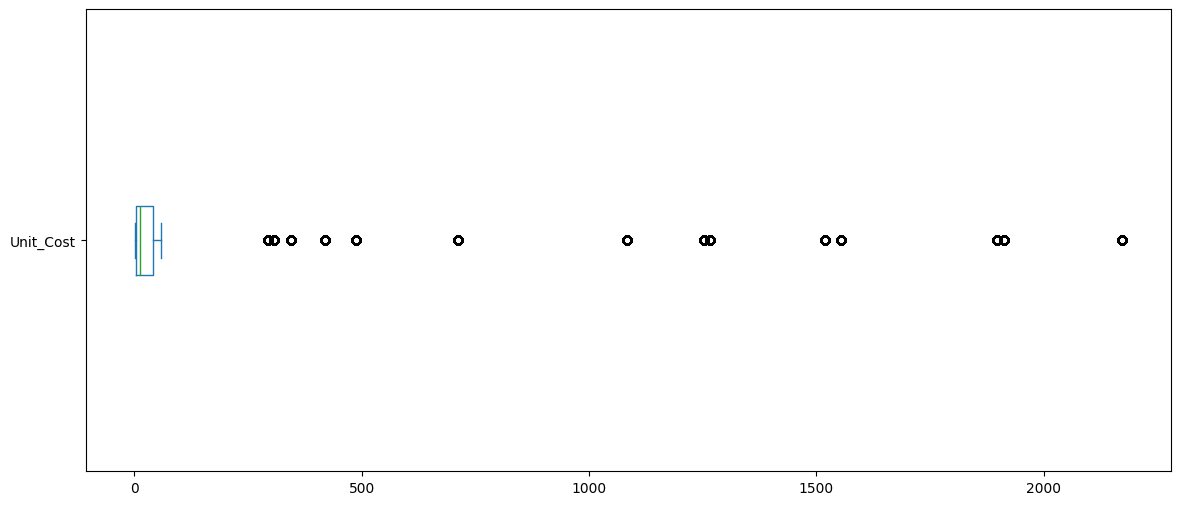

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

### **Revenue Boxplot Visualization**


<Axes: >

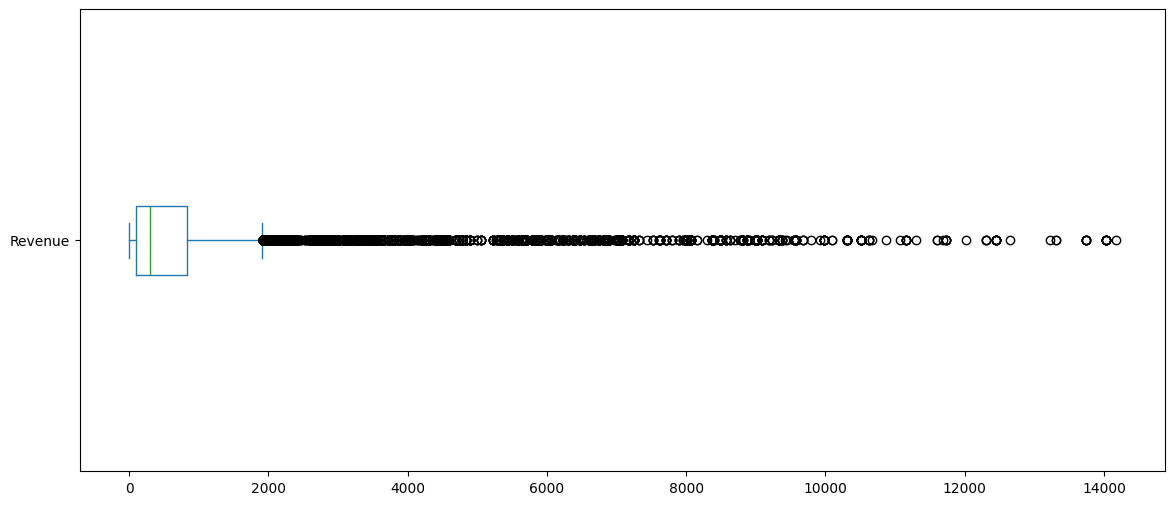

In [ ]:
sales['Revenue'].plot(kind='box', vert=False, figsize=(14,6))

### **Unit Price Boxplot Visualization**


<Axes: >

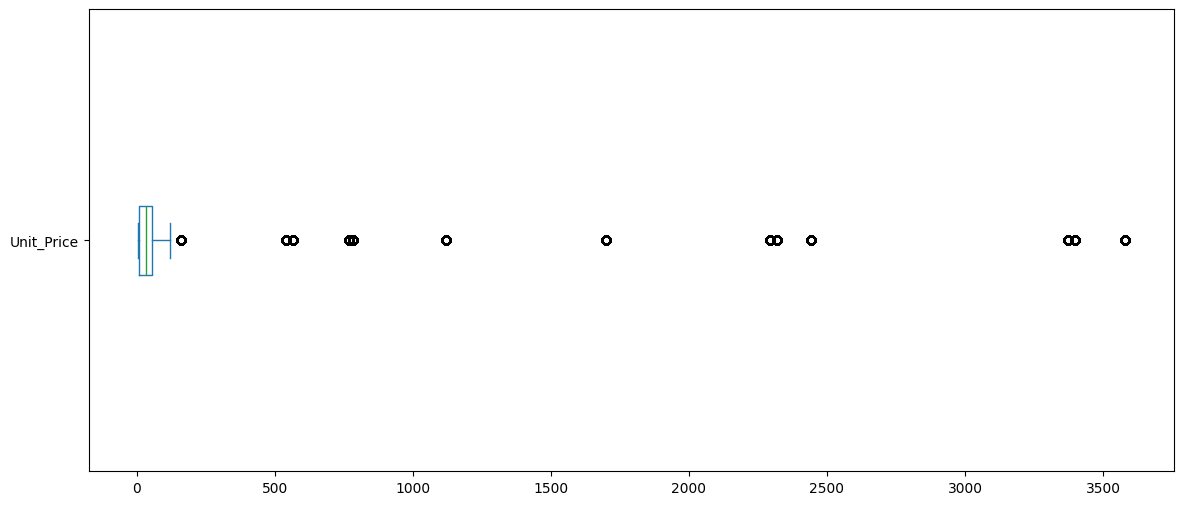

In [ ]:
sales['Unit_Price'].plot(kind='box', vert=False, figsize=(14,6))

### **Unit Cost Density Plot**


<Axes: ylabel='Density'>

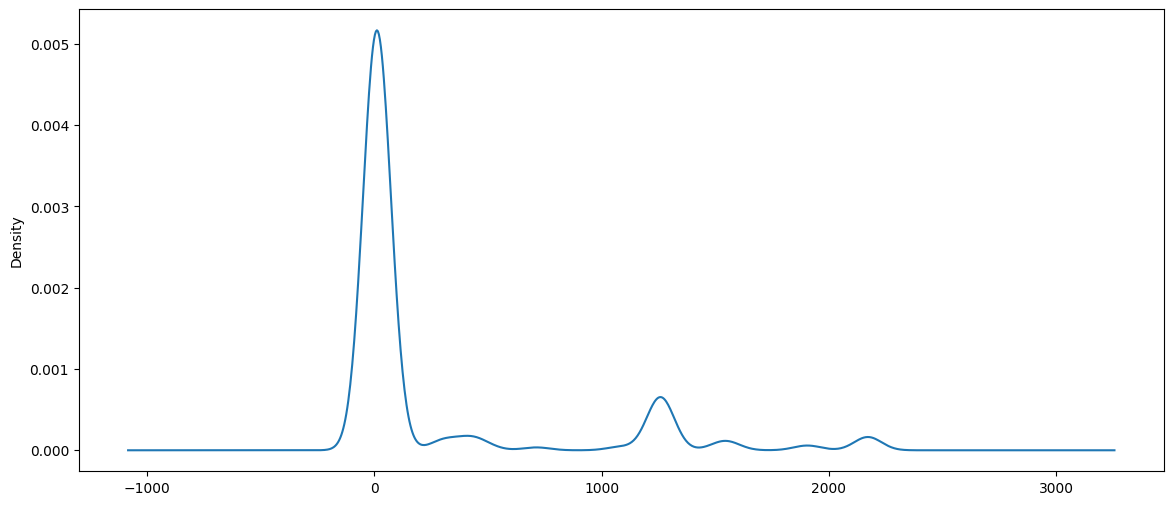

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

### **Age Group Density Plot**


<Axes: ylabel='Density'>

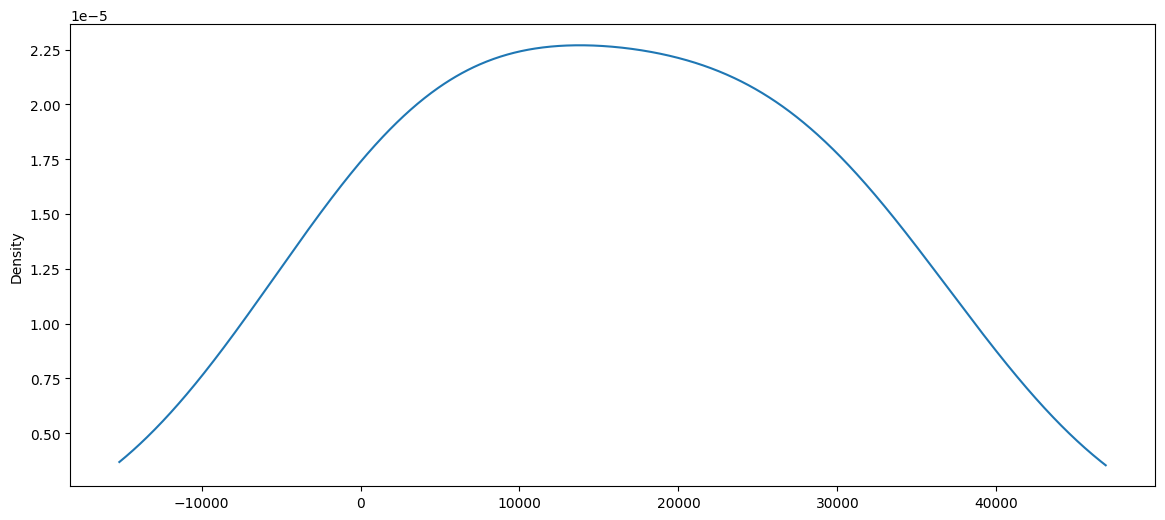

In [ ]:
sales['Age_Group'].value_counts().plot(kind='density', figsize=(14,6))

### **Customer Gender Bar Chart**


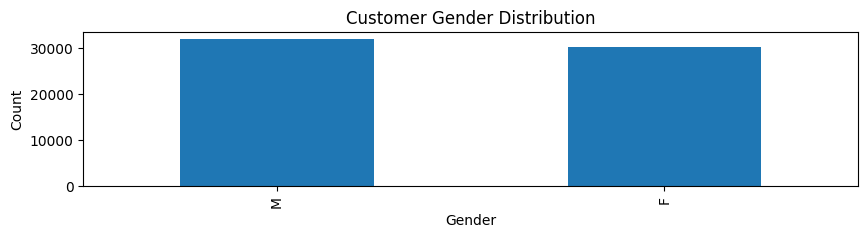

In [ ]:
sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(10,2))
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### **Gender Distribution Density Plot**


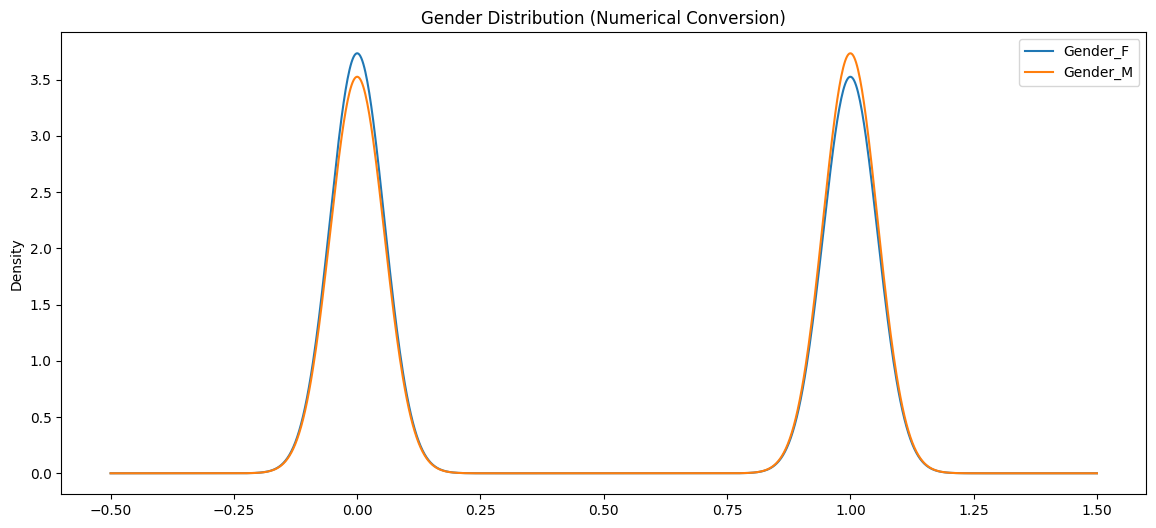

In [ ]:
gender_numeric = pd.get_dummies(sales['Customer_Gender'], prefix='Gender').astype(int)


plt.figure(figsize=(14,6))
for column in gender_numeric.columns:
    gender_numeric[column].plot(kind='density', label=column)
plt.title('Gender Distribution (Numerical Conversion)')
plt.legend()
plt.show()

### **Data View**

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


### **Age Group Value Counts**


In [ ]:
sales['Age_Group'].value_counts()

,count
Age_Group,
Adults (35-64),31372
Young Adults (25-34),21168
Youth (<25),9326
Seniors (64+),338


### **Age Group Pie Chart**


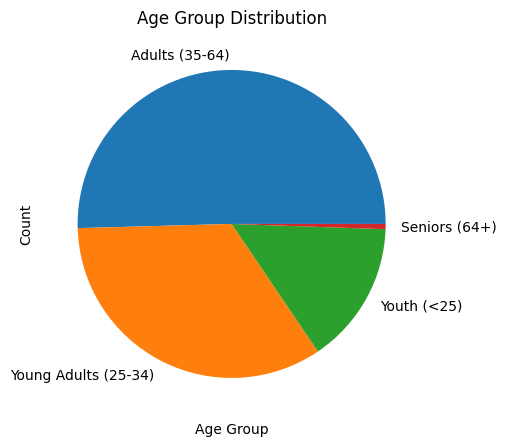

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(5,5))
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### **Age Group Bar Chart**


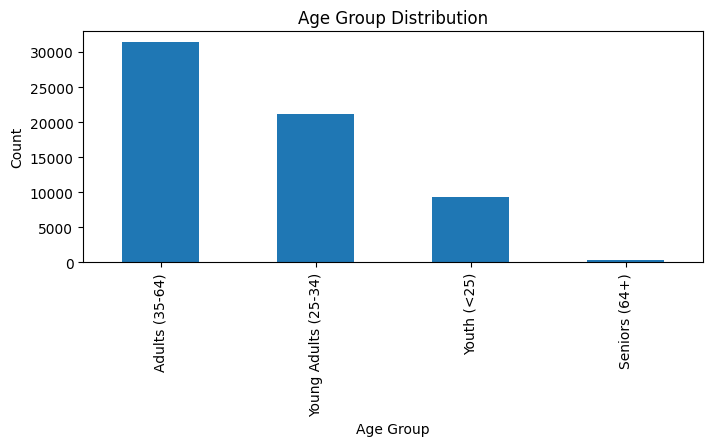

In [ ]:
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(8,3))
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### **Correlation Matrix Calculation**


In [ ]:
corr = sales.select_dtypes(include=np.number).corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.006986,-0.013563,-0.002892,0.004245,0.004424,0.007118,0.004734,0.005705
Year,-0.006986,1.000000,0.043652,0.116910,-0.234152,-0.229221,-0.202234,-0.235366,-0.228766
Customer_Age,-0.013563,0.043652,1.000000,0.016351,-0.009652,-0.009796,0.000202,-0.011556,-0.007567
Order_Quantity,-0.002892,0.116910,0.016351,1.000000,-0.514771,-0.519876,-0.261990,-0.319192,-0.305803
Unit_Cost,0.004245,-0.234152,-0.009652,-0.514771,1.000000,0.997830,0.765842,0.834362,0.828664
Unit_Price,0.004424,-0.229221,-0.009796,-0.519876,0.997830,1.000000,0.772360,0.828072,0.826863
Profit,0.007118,-0.202234,0.000202,-0.261990,0.765842,0.772360,1.000000,0.903255,0.958911
Cost,0.004734,-0.235366,-0.011556,-0.319192,0.834362,0.828072,0.903255,1.000000,0.987881
Revenue,0.005705,-0.228766,-0.007567,-0.305803,0.828664,0.826863,0.958911,0.987881,1.000000
